# Installation of Libraries

In [1]:
import numpy as np  # Importing the NumPy library and renaming it to "np"
import pandas as pd  # Importing the Pandas library and renaming it to "pd"
import matplotlib.pyplot as plt  # Importing the Pyplot module from the Matplotlib library and renaming it to "plt"
import seaborn as sns  # Importing the Seaborn library and renaming it to "sns"
%matplotlib inline  

In [2]:
#uploading dataset from internal storage
df = pd.read_csv(r"C:\Users\niraj\Downloads\archiveee\Bengaluru_House_Data.csv")

In [3]:
#reading the first few data from the top 
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Data Preprocessig, Cleaning and Exploratry Analysis 

In [4]:
#checking the shape of the dataset
df.shape

(13320, 9)

In [5]:
#counting all the null values present in the each columns
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<AxesSubplot:>

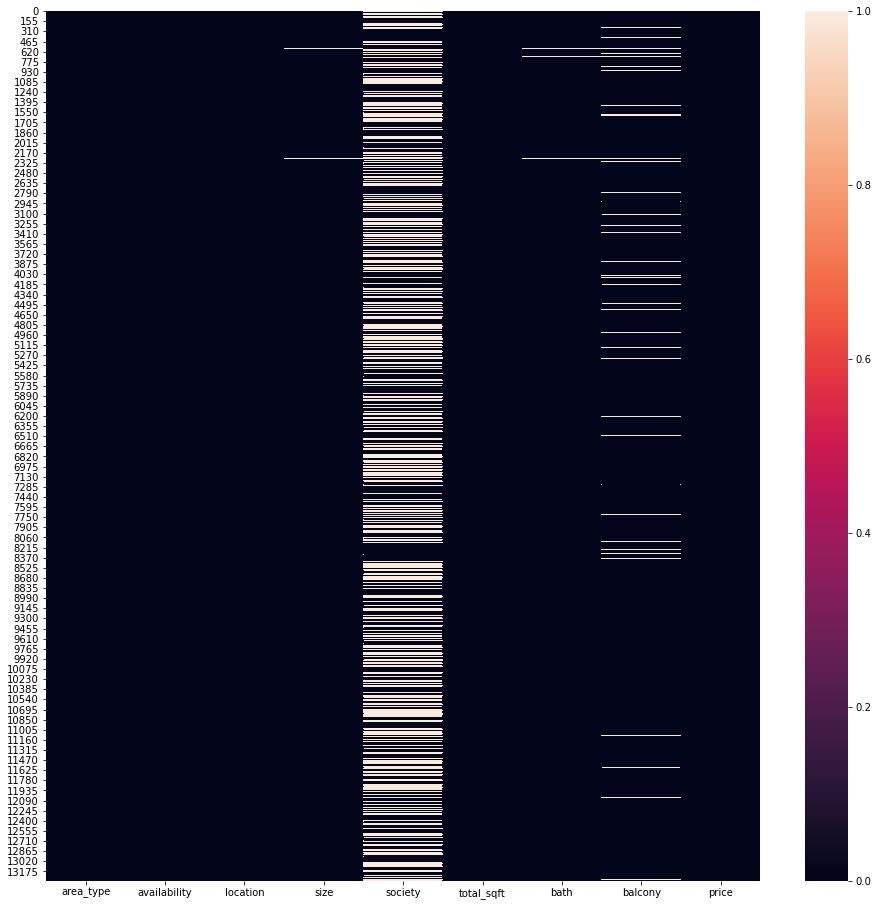

In [6]:
#plotting the heatmap to check the null values in datset (visual representation)
plt.figure(figsize=(16,16))
sns.heatmap(df.isnull())

In [7]:
#calculating the percentage of missing data in the dataset 
df.isnull().sum()/df.shape[0]*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

## Here, the data will be preprocessed for model fitting. In the first scenario, all the columns having category values will be eliminated, and only the columns with numeric values would be processed.

In [8]:
df.keys()

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [9]:
#we will drop the columns containg categorical value and a coolumn which has a null value more 20%
df_drop = df.drop(columns=['area_type','availability','location','society'])

In [10]:
df_drop.head()

,size,total_sqft,bath,balcony,price
0,2 BHK,1056,2.0,1.0,39.07
1,4 Bedroom,2600,5.0,3.0,120.00
2,3 BHK,1440,2.0,3.0,62.00
3,3 BHK,1521,3.0,1.0,95.00
4,2 BHK,1200,2.0,1.0,51.00


In [11]:
#since, we want to predict the price of the hosue we need to check the types of data present in the dataset
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        13304 non-null  object 
 1   total_sqft  13320 non-null  object 
 2   bath        13247 non-null  float64
 3   balcony     12711 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(3), object(2)
memory usage: 520.4+ KB


In [12]:
# size and total_sqft are two columns present in object type data, so we need to convert that object Dtype into Float/int Dtype
df_drop['size'].unique

<bound method Series.unique of 0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object>

In [13]:
#it seems that column size has both string and integer stored together in the dataset. so we will sepearte integer from the str value 
df_drop['bhk'] = pd.to_numeric(df_drop['size'].str.extract('(\d+)')[0])

In [14]:
df_drop.head()

,size,total_sqft,bath,balcony,price,bhk
0,2 BHK,1056,2.0,1.0,39.07,2.0
1,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,3 BHK,1440,2.0,3.0,62.00,3.0
3,3 BHK,1521,3.0,1.0,95.00,3.0
4,2 BHK,1200,2.0,1.0,51.00,2.0


In [15]:
df_drop[50:60]

,size,total_sqft,bath,balcony,price,bhk
50,2 BHK,1270,2.0,1.0,50.0,2.0
51,3 BHK,1670,3.0,1.0,99.0,3.0
52,3 BHK,2010,3.0,2.0,91.0,3.0
53,2 BHK,1185,2.0,2.0,75.0,2.0
54,3 BHK,1600,2.0,3.0,75.0,3.0
55,2 BHK,1200,2.0,2.0,44.0,2.0
56,4 Bedroom,3010 - 3410,NaN,NaN,192.0,4.0
57,2 BHK,1500,2.0,2.0,185.0,2.0
58,6 Bedroom,1407,4.0,1.0,150.0,6.0
59,2 BHK,840,2.0,2.0,45.0,2.0


In [16]:
#we have extracted numeric value from column size so we will drop that column as well
df_drop.drop(columns=['size'], inplace = True)

In [17]:
df_drop.head()

,total_sqft,bath,balcony,price,bhk
0,1056,2.0,1.0,39.07,2.0
1,2600,5.0,3.0,120.00,4.0
2,1440,2.0,3.0,62.00,3.0
3,1521,3.0,1.0,95.00,3.0
4,1200,2.0,1.0,51.00,2.0


In [18]:
df_drop.isnull().sum(),df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_sqft  13320 non-null  object 
 1   bath        13247 non-null  float64
 2   balcony     12711 non-null  float64
 3   price       13320 non-null  float64
 4   bhk         13304 non-null  float64
dtypes: float64(4), object(1)
memory usage: 520.4+ KB


(total_sqft      0
 bath           73
 balcony       609
 price           0
 bhk            16
 dtype: int64,
 None)

In [19]:
df_drop.isnull().sum()/df_drop.shape[0]*100, df_drop.shape

(total_sqft    0.000000
 bath          0.548048
 balcony       4.572072
 price         0.000000
 bhk           0.120120
 dtype: float64,
 (13320, 5))

<AxesSubplot:>

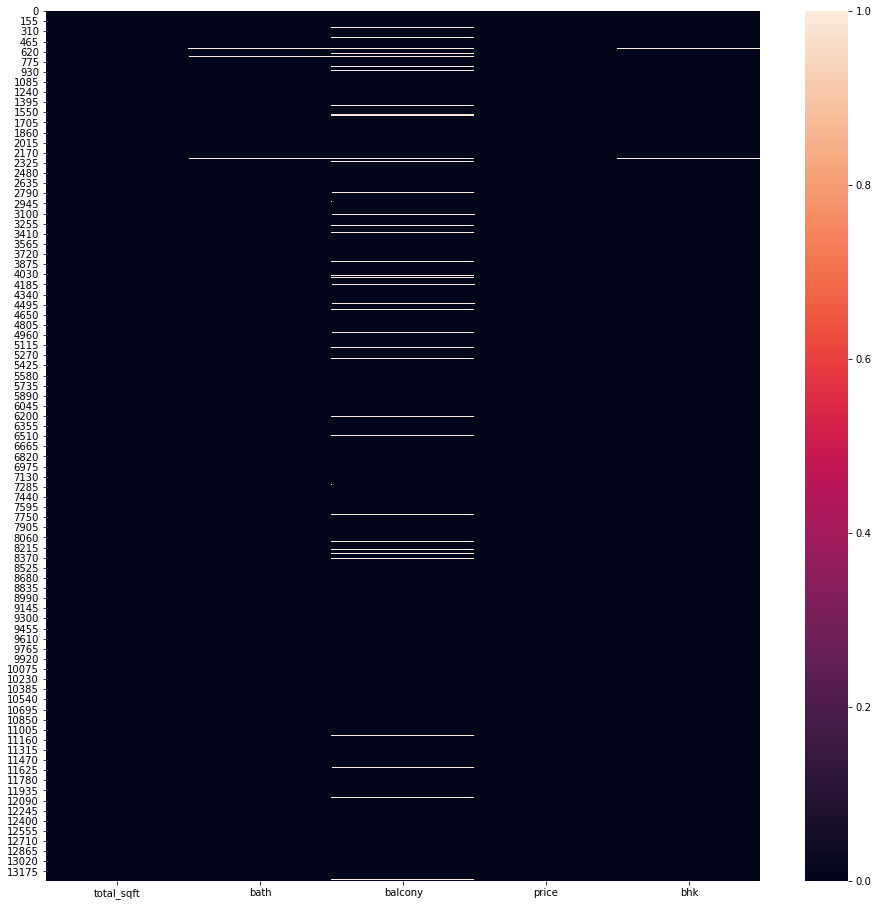

In [20]:
#plotting heatmap to see the missing value present in the new dataframe after dropping the columns
plt.figure(figsize=(16,16))
sns.heatmap(df_drop.isnull())

In [21]:
#here the range value are converted into single integer 
def convertRange_into_singleinteger(a):
    try:
        return float(a)
    except ValueError:
        pass
    
    try:
        lower_bound, upper_bound = map(float, a.split('-'))
        return (lower_bound + upper_bound) / 2
    except ValueError:
        return None

In [22]:
#after converting the range value into float type we applied the changes into dataframe
df_drop['total_sqft'] = df_drop['total_sqft'].apply(convertRange_into_singleinteger)

In [23]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_sqft  13274 non-null  float64
 1   bath        13247 non-null  float64
 2   balcony     12711 non-null  float64
 3   price       13320 non-null  float64
 4   bhk         13304 non-null  float64
dtypes: float64(5)
memory usage: 520.4 KB


In [24]:
#checking the null value percentages
df_drop.isnull().sum()/df_drop.shape[0]*100, df_drop.shape

(total_sqft    0.345345
 bath          0.548048
 balcony       4.572072
 price         0.000000
 bhk           0.120120
 dtype: float64,
 (13320, 5))

## There are several approaches to handling missing values in a dataset. Since the missing values are less than one %, we will first remove the row that contains them. 

In [25]:
new_df_drop = df_drop.dropna()

In [26]:
#checking the missing value after dropping the rows which contains missing value 
new_df_drop.isnull().sum(),new_df_drop.shape

(total_sqft    0
 bath          0
 balcony       0
 price         0
 bhk           0
 dtype: int64,
 (12669, 5))

# Now we will perform Feature Engineering to analyze the data

In [27]:
new_df_drop.describe()

,total_sqft,bath,balcony,price,bhk
count,12669.000000,12669.000000,12669.000000,12669.000000,12669.000000
mean,1511.842126,2.616308,1.585682,105.951073,2.736443
std,1162.051672,1.223838,0.816734,131.808053,1.202598
min,5.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,49.020000,2.000000
50%,1260.000000,2.000000,2.000000,70.000000,3.000000
75%,1640.000000,3.000000,2.000000,115.000000,3.000000
max,52272.000000,40.000000,3.000000,2912.000000,43.000000


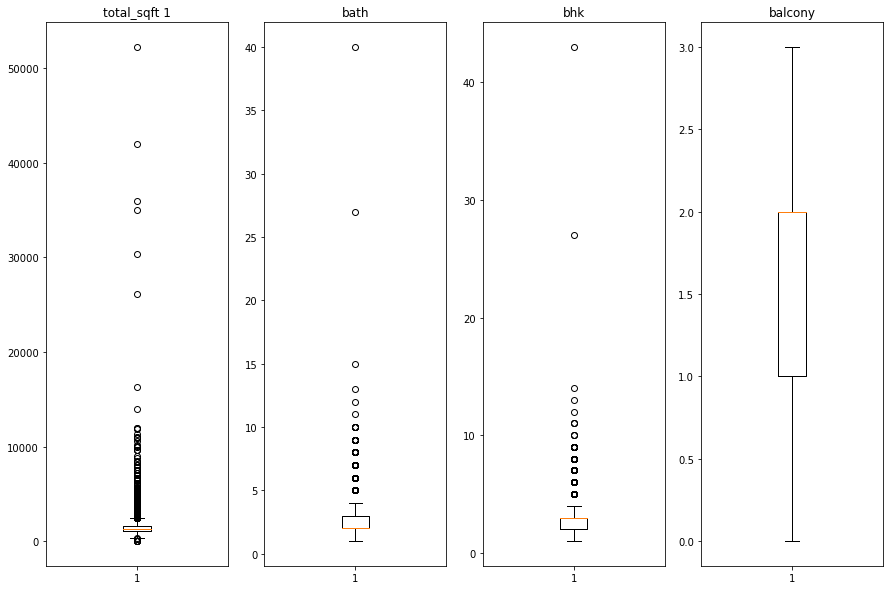

In [28]:
# Create a figure and three subplots for each boxplot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(15,10))

# Create the first boxplot for total_sqft
ax1.boxplot(new_df_drop['total_sqft'])
ax1.set_title('total_sqft 1')

# Create the second boxplot for bath 
ax2.boxplot(new_df_drop['bath'])
ax2.set_title('bath')

# Create the third boxplot for bhk 
ax3.boxplot(new_df_drop['bhk'])
ax3.set_title('bhk')

# Create the fourth boxplot for bhk 
ax4.boxplot(new_df_drop['balcony'])
ax4.set_title('balcony')

# Show the plot
plt.show()


### The boxplot shows that the dataset has several outliers. Hence, using the quartile approach, we will eliminate the outliers.

In [29]:
def remove_outliers_quartile(new_df_drop, total_sqft):
    q1 = new_df_drop[total_sqft].quantile(0.25)
    q3 = new_df_drop[total_sqft].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    df_filtered = new_df_drop[(new_df_drop[total_sqft] > lower_limit) & (new_df_drop[total_sqft] < upper_limit)]
    return df_filtered
new_df2 = remove_outliers_quartile(new_df_drop, 'total_sqft')

In [30]:
#checking the difference between dataset before and after removing outliers
print(len(new_df_drop)-len(new_df2))

1069


In [31]:
new_df2.describe()

,total_sqft,bath,balcony,price,bhk
count,11600.000000,11600.000000,11600.000000,11600.000000,11600.000000
mean,1303.787690,2.452155,1.561293,83.784819,2.606983
std,393.268536,1.053179,0.794759,64.904288,1.093335
min,296.000000,1.000000,0.000000,9.000000,1.000000
25%,1075.750000,2.000000,1.000000,47.552500,2.000000
50%,1225.000000,2.000000,2.000000,65.000000,2.000000
75%,1510.250000,3.000000,2.000000,97.682500,3.000000
max,2448.000000,40.000000,3.000000,1063.000000,43.000000


In [32]:
def remove_outliers_quartile(new_df2, bath):
    q1 = new_df2[bath].quantile(0.25)
    q3 = new_df2[bath].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    df1_filtered = new_df2[(new_df2[bath] >= lower_limit) & (new_df2[bath] <= upper_limit)]
    return df1_filtered
new_df3 = remove_outliers_quartile(new_df2, 'bath')

In [33]:
print(len(new_df2)-len(new_df3))

416


In [34]:
new_df3.describe()

,total_sqft,bath,balcony,price,bhk
count,11184.000000,11184.000000,11184.000000,11184.000000,11184.000000
mean,1298.358477,2.317418,1.552307,79.949964,2.480866
std,384.475150,0.691873,0.785464,58.556830,0.760976
min,296.000000,1.000000,0.000000,9.000000,1.000000
25%,1075.000000,2.000000,1.000000,47.000000,2.000000
50%,1225.000000,2.000000,2.000000,65.000000,2.000000
75%,1500.000000,3.000000,2.000000,94.000000,3.000000
max,2448.000000,4.000000,3.000000,1063.000000,8.000000


In [35]:
def remove_outliers_quartile(new_df3, bhk):
    q1 = new_df3[bhk].quantile(0.25)
    q3 = new_df3[bhk].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    df2_filtered = new_df3[(new_df2[bhk] >= lower_limit) & (new_df3[bhk] <= upper_limit)]
    return df2_filtered
new_df4 = remove_outliers_quartile(new_df3, 'bhk')

<ipython-input-35-dacd3cf1bf52>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_filtered = new_df3[(new_df2[bhk] >= lower_limit) & (new_df3[bhk] <= upper_limit)]


In [36]:
print(len(new_df3)-len(new_df4))

144


In [37]:
new_df4.describe()

,total_sqft,bath,balcony,price,bhk
count,11040.000000,11040.000000,11040.000000,11040.000000,11040.000000
mean,1298.128551,2.299185,1.553170,78.819873,2.442029
std,382.265592,0.675077,0.783283,56.716331,0.679764
min,296.000000,1.000000,0.000000,9.000000,1.000000
25%,1076.000000,2.000000,1.000000,46.500000,2.000000
50%,1229.000000,2.000000,2.000000,65.000000,2.000000
75%,1500.000000,3.000000,2.000000,92.000000,3.000000
max,2448.000000,4.000000,3.000000,1063.000000,4.000000


In [38]:
new_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11040 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_sqft  11040 non-null  float64
 1   bath        11040 non-null  float64
 2   balcony     11040 non-null  float64
 3   price       11040 non-null  float64
 4   bhk         11040 non-null  float64
dtypes: float64(5)
memory usage: 517.5 KB


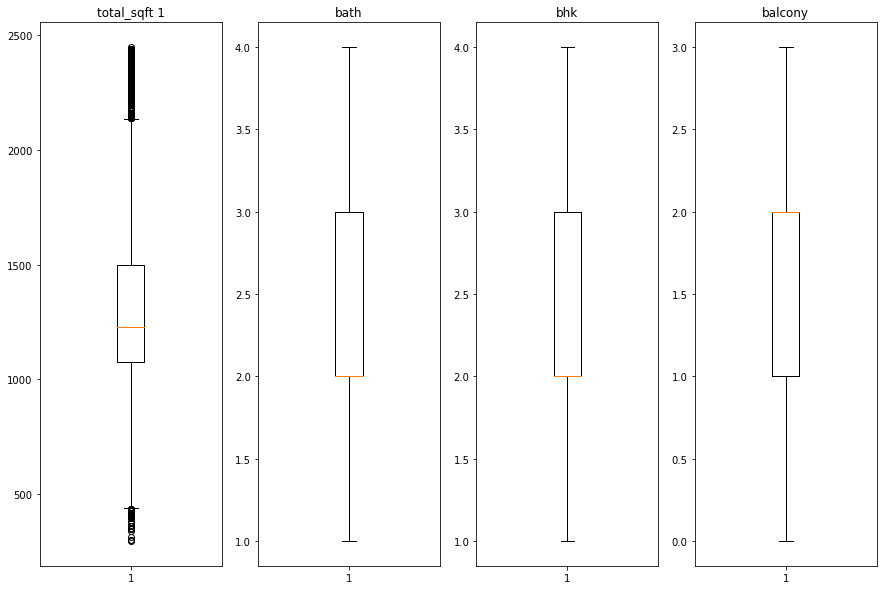

In [39]:
colors = ['pink', 'lightblue', 'lightgreen', 'yellow']
# Create a figure and three subplots for each boxplot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(15,10))

# Create the first boxplot for total_sqft
ax1.boxplot(new_df4['total_sqft'])
ax1.set_title('total_sqft 1')

# Create the second boxplot for bath 
ax2.boxplot(new_df4['bath'])
ax2.set_title('bath')

# Create the third boxplot for bhk 
ax3.boxplot(new_df4['bhk'])
ax3.set_title('bhk')

# Create the fourth boxplot for bhk 
ax4.boxplot(new_df4['balcony'])
ax4.set_title('balcony')

# Show the plot
plt.show()


In [40]:
#after the preprocessing of data saving the cleaned data into csv
new_df4.to_csv("cleaned_dataset.csv")

In [41]:
Cleaned_data_ML = pd.read_csv('cleaned_dataset.csv')

In [42]:
Cleaned_data_ML.head(),Cleaned_data_ML.shape

(   Unnamed: 0  total_sqft  bath  balcony  price  bhk
 0           0      1056.0   2.0      1.0  39.07  2.0
 1           2      1440.0   2.0      3.0  62.00  3.0
 2           3      1521.0   3.0      1.0  95.00  3.0
 3           4      1200.0   2.0      1.0  51.00  2.0
 4           5      1170.0   2.0      1.0  38.00  2.0,
 (11040, 6))

# Model training and Evaluation
### Splitting cleaned dataset into training and testing dataset and performing ML algorithim 

In [43]:
x = Cleaned_data_ML[['total_sqft','bath','bhk']]
y = Cleaned_data_ML['price']

In [150]:
#importing all the necessary libraries to perform the ML task
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [45]:
#splitting the dataset into train, test and split 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=10)

In [46]:
#standardize the numerical variables
scaler = StandardScaler()

In [47]:
lr = LinearRegression(normalize=True)

In [48]:
#chain multiple preprocessing and modeling steps into a single pipeline
pipe1 = make_pipeline(scaler, lr)

In [49]:
#training a machine learning model using a pipeline that preprocesses the data and trains the model
pipe1.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [50]:
# evaluating a linear regression model's performance on a set of test data
y_prediction_lr = list(pipe1.predict(x_test))
r2_score(y_test, y_prediction_lr)

0.3681278598186021

In [152]:
# Evaluate the model using mean squared error and mean absolute errro
mse_lr = mean_squared_error(y_test, y_prediction_lr)
mae_lr = mean_absolute_error(y_test, y_prediction_lr)
print("Mean Squared Error:", mse_lr)
print("Mean Absolute Error:", mae_lr)

Mean Squared Error: 2364.07918526366
Mean Absolute Error: 25.551984330023163


In [52]:
#creating an instance of the Lasso class from the Scikit-learn library.
ls = Lasso()

In [53]:
pipe2 = make_pipeline(scaler, ls)

In [54]:
pipe2.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [55]:
y_prediction_ls = list(pipe2.predict(x_test))
r2_score(y_test, y_prediction_ls)

0.3657727833247495

In [153]:
# Evaluate the model using mean squared error and mean absolute errro
mse_ls = mean_squared_error(y_test, y_prediction_ls)
mae_ls = mean_absolute_error(y_test, y_prediction_ls)
print("Mean Squared Error:", mse_ls)
print("Mean Absolute Error:", mae_ls)

Mean Squared Error: 2372.8904414732183
Mean Absolute Error: 25.450137790801428


In [56]:
##creating an instance of the ridge class from the Scikit-learn library.
rg = Ridge()

In [57]:
pipe3 = make_pipeline(scaler, rg)

In [58]:
pipe3.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [59]:
y_prediction_rg = list(pipe3.predict(x_test))
r2_score(y_test, y_prediction_rg)

0.36812611148627994

In [154]:
# Evaluate the model using mean squared error and mean absolute errro
mse_rg = mean_squared_error(y_test, y_prediction_rg)
mae_rg = mean_absolute_error(y_test, y_prediction_rg)
print("Mean Squared Error:", mse_rg)
print("Mean Absolute Error:", mae_rg)

Mean Squared Error: 2364.0857264541773
Mean Absolute Error: 25.551698405786127


In [60]:
from sklearn.svm import SVR
model = SVR()

In [61]:
pipe4 = make_pipeline(scaler, model)

In [62]:
pipe4.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [155]:
y_prediction_svr = list(pipe4.predict(x_test))

In [63]:
pipe4.score(x_test,y_test)

0.3654223457914143

In [156]:
# Evaluate the model using mean squared error and mean absolute errro 
mse_svr = mean_squared_error(y_test, y_prediction_svr)
mae_svr = mean_absolute_error(y_test, y_prediction_svr)
print("Mean Squared Error:", mse_svr)
print("Mean Absolute Error:", mae_svr)

Mean Squared Error: 2374.2015644451144
Mean Absolute Error: 22.191188212051728


In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rf = RandomForestRegressor()

In [66]:
pipe5 = make_pipeline(scaler, rf)

In [67]:
pipe5.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [157]:
y_prediction_rf = list(pipe5.predict(x_test))

In [158]:
pipe5.score(x_test,y_test)

0.44325452268412735

In [159]:
# Evaluate the model using mean squared error and mean absolute errro
mse_rf = mean_squared_error(y_test, y_prediction_rf)
mae_rf = mean_absolute_error(y_test, y_prediction_rf)
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)

Mean Squared Error: 2083.001149622269
Mean Absolute Error: 21.803856542702494


# Conclusion

In [69]:
print('LinearRegression Accuracy:', r2_score(y_test, y_prediction_lr))
print('Lasso Accuracy:', r2_score(y_test, y_prediction_ls))
print('Ridge Accuracy:', r2_score(y_test, y_prediction_rg))

print('Support Vector Regressor Accuracy:', pipe4.score(x_test,y_test))
print('RandomForest Regressor Accuracy:', pipe5.score(x_test,y_test))

LinearRegression Accuracy: 0.3681278598186021
Lasso Accuracy: 0.3657727833247495
Ridge Accuracy: 0.36812611148627994
Support Vector Regressor Accuracy: 0.3654223457914143
RandomForest Regressor Accuracy: 0.44325452268412735


In [161]:
print("Mean Squared Error Linear Regression:", mse_lr)
print("Mean Absolute Error Linear Regression:", mae_lr)
print()
print("Mean Squared Error Lasso:", mse_ls)
print("Mean Absolute Error Lasso:", mae_ls)
print()
print("Mean Squared Error Ridge:", mse_rg)
print("Mean Absolute Error Ridge:", mae_rg)
print()
print("Mean Squared Error Support Vector Regressor:", mse_svr)
print("Mean Absolute Error Support Vector Regressor:", mae_svr)
print()
print("Mean Squared Error Random Forest:", mse_rf)
print("Mean Absolute ErrorRandom Forest:", mae_rf)

Mean Squared Error Linear Regression: 2364.07918526366
Mean Absolute Error Linear Regression: 25.551984330023163

Mean Squared Error Lasso: 2372.8904414732183
Mean Absolute Error Lasso: 25.450137790801428

Mean Squared Error Ridge: 2364.0857264541773
Mean Absolute Error Ridge: 25.551698405786127

Mean Squared Error Support Vector Regressor: 2374.2015644451144
Mean Absolute Error Support Vector Regressor: 22.191188212051728

Mean Squared Error Random Forest: 2083.001149622269
Mean Absolute ErrorRandom Forest: 21.803856542702494


## We feel embarrassed after seeing the results because the models' accuracy is so poor. As a result, we will preprocess the data once again but in a different way. We will now take into account the location as it is important in determining the price of the house. Also, we should tackle outliers in a different manner.

# Data Preprocessig, Cleaning and Exploratry Analysis 

In [70]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [71]:
#dropping the columns containing categorical value and column which has null value more than 20%
whole_new_df = df.drop(columns=['area_type','availability','society','balcony'], axis=1)

In [72]:
whole_new_df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Now we will tackle each attribute carefully and make it clean for feeding it to our machine learning model.

In [73]:
whole_new_df.isnull().sum(), whole_new_df.shape

(location       1
 size          16
 total_sqft     0
 bath          73
 price          0
 dtype: int64,
 (13320, 5))

## Given that there is only one missing value for the location column, we may fill it with the value that has been used the most frequently.

In [74]:
#count the each instance in column 'location'
#for column in whole_new_df.columns:
#    value_counts = whole_new_df[column].value_counts()
 #   print(f'Counts for {column}:')
  #  print(value_counts)
   # print()

In [75]:
#count the each instance in column 'location'
whole_new_df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [76]:
#now we will fill the missing value with mode value in the column location
whole_new_df['location'] = whole_new_df['location'].fillna(whole_new_df['location'].mode().iloc[0])


In [77]:
#checking percentage of null value in the dataset 
whole_new_df.isnull().sum(), whole_new_df.isnull().sum()/whole_new_df.shape[0]

(location       0
 size          16
 total_sqft     0
 bath          73
 price          0
 dtype: int64,
 location      0.000000
 size          0.001201
 total_sqft    0.000000
 bath          0.005480
 price         0.000000
 dtype: float64)

## Because the location column has no longer missing a value, we can move on to the size. We can estimate the dataset's mode value for that specific column since the missing value is less than one percentage.

In [78]:
whole_new_df['size'] = whole_new_df['size'].fillna(whole_new_df['size'].mode().iloc[0])

In [79]:
whole_new_df.isnull().sum()

location       0
size           0
total_sqft     0
bath          73
price          0
dtype: int64

In [80]:
whole_new_df['bath'] = whole_new_df['bath'].fillna(whole_new_df['bath'].mode().iloc[0])

In [81]:
#after filling the missing value in the dataset checking the status of the dataset
whole_new_df.isnull().sum(), whole_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


(location      0
 size          0
 total_sqft    0
 bath          0
 price         0
 dtype: int64,
 None)

<AxesSubplot:>

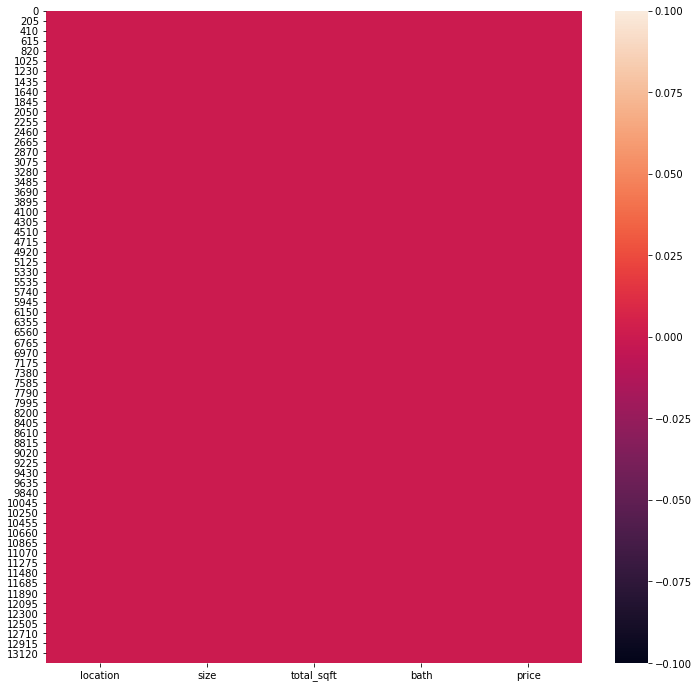

In [82]:
#plotting heatmap to check if there are any missing value present in the dataset
plt.figure(figsize=(12,12))
sns.heatmap(whole_new_df.isnull())

## We substituted the most often repeated values for the few missing values that were present. Considering the data's distribution might also help you decide whether to use the mean, median, or mode to fill in the missing number.
## Now, we dont have any missing value in the dataset, so we will convert the object type data into float type or int type to make it suitbale for feeding into machine learning model.

In [83]:
#extracting int from column size
whole_new_df['size_bhk'] = pd.to_numeric(df['size'].str.extract('(\d+)')[0])

In [84]:
whole_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   size_bhk    13304 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [85]:
whole_new_df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [86]:
#here the range value are converted into single integer 
def convertRange_into_singleinteger(a):
    try:
        return float(a)
    except ValueError:
        pass
    
    try:
        lower_bound, upper_bound = map(float, a.split('-'))
        return (lower_bound + upper_bound) / 2
    except ValueError:
        return None


In [87]:
#apply function to apply the changes in dataset
whole_new_df['total_sqft'] = whole_new_df['total_sqft'].apply(convertRange_into_singleinteger)

In [88]:
whole_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13274 non-null  float64
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   size_bhk    13304 non-null  float64
dtypes: float64(4), object(2)
memory usage: 624.5+ KB


##  At the attribute location, we simply eliminated any leading or trailing white spaces for each value. The locations which had been repeated 20 times or less were then filtered, and they were given the label 'others'. 

In [89]:
#removing any leading or trailing white spaces of each value in the attribute location
whole_new_df['location'] = whole_new_df['location'].apply(lambda x: x.strip())

In [90]:
location_count = whole_new_df['location'].value_counts()

In [91]:
#counting location which has been reptaed only 20 times in the dataset
location_count_20 = whole_new_df['location'].value_counts()[location_count<=20]
location_count_20

Poorna Pragna Layout              20
Yelachenahalli                    20
Sanjay nagar                      20
HBR Layout                        20
Kalyan nagar                      19
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1150, dtype: int64

In [92]:
#naming all the location to Others which has been repetated 20 times
whole_new_df['location']=whole_new_df['location'].apply(lambda x: 'Other' if x in location_count_20 else x)

In [93]:
whole_new_df['location'].value_counts()

Other                 4288
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Domlur                  22
Hoskote                 22
Binny Pete              21
Basaveshwara Nagar      21
Ulsoor                  21
Name: location, Length: 145, dtype: int64

In [94]:
whole_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13274 non-null  float64
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   size_bhk    13304 non-null  float64
dtypes: float64(4), object(2)
memory usage: 624.5+ KB


In [95]:
whole_new_df.drop(['size'],axis=1)

,location,total_sqft,bath,price,size_bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Other,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5.0
13316,Other,3600.0,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0
13318,Padmanabhanagar,4689.0,4.0,488.00,4.0


In [96]:
whole_new_df.describe()

,total_sqft,bath,price,size_bhk
count,13274.000000,13320.000000,13320.000000,13304.000000
mean,1559.626694,2.688814,112.565627,2.803743
std,1238.405258,1.338754,148.971674,1.294974
min,1.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1276.000000,2.000000,72.000000,3.000000
75%,1680.000000,3.000000,120.000000,3.000000
max,52272.000000,40.000000,3600.000000,43.000000


<AxesSubplot:>

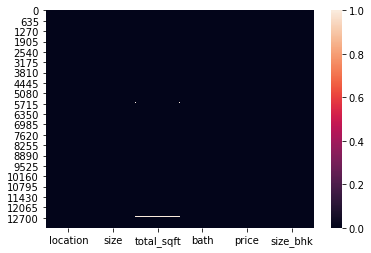

In [97]:
sns.heatmap(whole_new_df.isnull())

 # Now we will perform Feature Engineering to analyze the data

### Total sqft has a minimum value of 1, which is impossible. As a result, we'll attempt to filter out the total sqft's real minimum value. To filter the values in the dataset, we will add columns like price per square foot (price per sqft) and bedroom per square foot (bhk per sqft).
#### If we take a closer look at the pricing, we can see that it reflects the cost of the entire floor area of the flat. We divide the price by the total square feet of the unit to determine the cost per square foot. We will first multiply the price by 1,000 because it is expressed in thousands of dollars. size has already been converted to size_bhk, we removed the size column.

In [98]:
whole_new_df['price_per_sqft'] = whole_new_df['price']*1000/whole_new_df['total_sqft']

In [99]:
whole_new_df['bhk_per_sqft'] = whole_new_df['total_sqft']/whole_new_df['size_bhk']

In [100]:
whole_new_df.describe()

,total_sqft,bath,price,size_bhk,price_per_sqft,bhk_per_sqft
count,13274.000000,13320.000000,13320.000000,13304.000000,13274.000000,13258.000000
mean,1559.626694,2.688814,112.565627,2.803743,79.075012,574.420590
std,1238.405258,1.338754,148.971674,1.294974,1064.295948,387.584212
min,1.000000,1.000000,8.000000,1.000000,2.678298,0.250000
25%,1100.000000,2.000000,50.000000,2.000000,42.668645,473.333333
50%,1276.000000,2.000000,72.000000,3.000000,54.343063,552.250000
75%,1680.000000,3.000000,120.000000,3.000000,73.117461,625.000000
max,52272.000000,40.000000,3600.000000,43.000000,120000.000000,26136.000000


### In order to determine the standard deviation of the square footage in one bedroom, we constructed the column bhk per sqft. This will enable us to disregard or eliminate values that are lower than that (387)

In [101]:
whole_new_df = whole_new_df[(whole_new_df['total_sqft']/whole_new_df['size_bhk']>=387)]

In [102]:
whole_new_df.describe()

,total_sqft,bath,price,size_bhk,price_per_sqft,bhk_per_sqft
count,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000
mean,1619.028631,2.535066,111.694018,2.609672,61.768061,611.630420
std,1286.996428,1.038168,154.578534,0.931469,39.952360,392.629467
min,395.000000,1.000000,9.000000,1.000000,2.678298,387.075000
25%,1130.000000,2.000000,50.000000,2.000000,42.032838,500.000000
50%,1317.000000,2.000000,70.000000,2.000000,52.733119,570.000000
75%,1720.000000,3.000000,115.000000,3.000000,68.000000,637.500000
max,52272.000000,16.000000,3600.000000,16.000000,1764.705882,26136.000000


## In order to determine whether or not there are outliers in the dataset, we will create a boxplot.

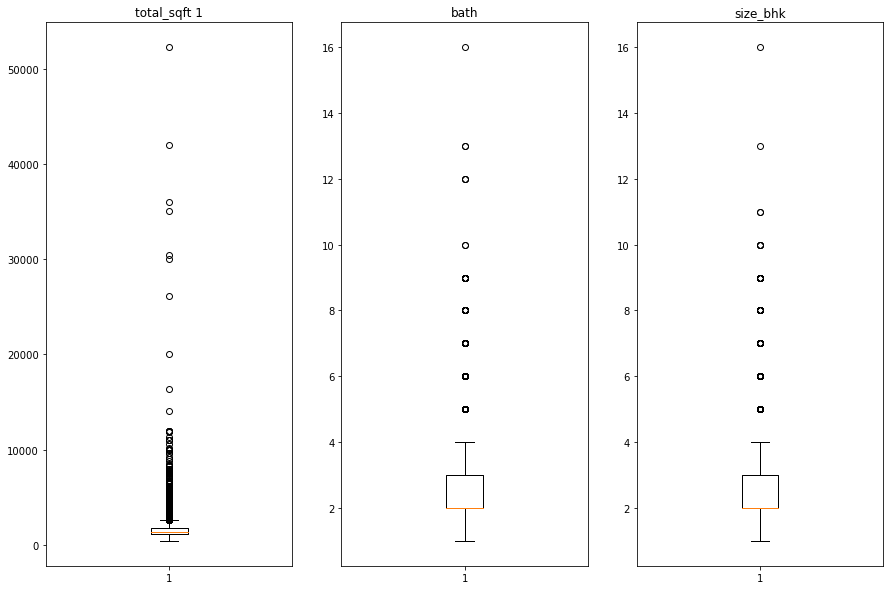

In [103]:
# Create a figure and three subplots for each boxplot
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,10))

# Create the first boxplot for total_sqft
ax1.boxplot(whole_new_df['total_sqft'])
ax1.set_title('total_sqft 1')

# Create the second boxplot for bath 
ax2.boxplot(whole_new_df['bath'])
ax2.set_title('bath')

# Create the third boxplot for bhk 
ax3.boxplot(whole_new_df['size_bhk'])
ax3.set_title('size_bhk')

# Show the plot
plt.show()

In [104]:
def remove_outliers_sqft(cf):
    # create an empty dataframe to store the output
    cf_result = pd.DataFrame()
    # group the dataframe by location
    for key, subcf in cf.groupby('location'):
        # calculate the mean and standard deviation of the price_per_sqft column for the current location
        m = np.mean(subcf.price_per_sqft)
        sd = np.std(subcf.price_per_sqft)
        # filter out the rows where price_per_sqft is greater than (mean - 3*std) and less than or equal to (mean + 3*std)
        gen_cf = subcf[(subcf.price_per_sqft > (m-3*sd)) & (subcf.price_per_sqft <= (m+3*sd))]
        # concatenate the filtered dataframe with the output dataframe
        cf_result = pd.concat([cf_result, gen_cf], ignore_index=True)
    # return the output dataframe
    return cf_result

# apply the remove_outliers_sqft function to the df dataframe
whole_new1_df1 = remove_outliers_sqft(whole_new_df)

whole_new1_df1.describe()

,total_sqft,bath,price,size_bhk,price_per_sqft,bhk_per_sqft
count,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000
mean,1602.520525,2.515759,104.535014,2.594553,59.581637,609.430785
std,1270.714792,1.013236,122.783626,0.916123,29.160036,391.741276
min,395.000000,1.000000,9.000000,1.000000,2.678298,387.075000
25%,1128.000000,2.000000,49.500000,2.000000,41.990232,500.000000
50%,1310.000000,2.000000,69.030000,2.000000,52.404839,570.000000
75%,1705.000000,3.000000,110.000000,3.000000,67.141270,636.000000
max,52272.000000,16.000000,2340.000000,16.000000,302.419355,26136.000000


In [105]:
def bhk_remover_outlier(pf):
    # create an empty array to store the indices of rows to be excluded
    exclude_indices = np.array([])
    # group the dataframe by location
    for location, location_pf in pf.groupby('location'):
        # create an empty dictionary to store the statistics for each BHK in the current location
        bhk_stats = {}
        # group the location dataframe by BHK and calculate the mean, std, and count for each BHK
        for bhk, bhk_pf in location_pf.groupby('size_bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_pf.price_per_sqft),
                'std': np.std(bhk_pf.price_per_sqft),
                'count': bhk_pf.shape[0]
            }
        # iterate over each BHK in the current location
        for bhk, bhk_pf in location_pf.groupby('size_bhk'):
            # get the statistics for the previous BHK if it exists and has a count greater than 5
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                # exclude the rows where the price_per_sqft is less than the mean of the previous BHK
                exclude_indices = np.append(exclude_indices, bhk_pf[bhk_pf.price_per_sqft < stats['mean']].index.values)
    # drop the excluded rows from the original dataframe and return it
    return pf.drop(exclude_indices, axis='index')

# apply the bhk_remover_outlier function to the df dataframe
whole_new2_df2 = bhk_remover_outlier(whole_new1_df1)

In [106]:
whole_new2_df2.describe()

,total_sqft,bath,price,size_bhk,price_per_sqft,bhk_per_sqft
count,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000
mean,1604.942901,2.512700,121.683234,2.533411,67.328984,626.865040
std,1030.740511,1.054409,142.420792,0.947328,32.455293,378.610177
min,395.000000,1.000000,9.000000,1.000000,5.739210,387.075000
25%,1120.000000,2.000000,52.350000,2.000000,47.619048,520.000000
50%,1305.000000,2.000000,80.000000,2.000000,60.000000,586.666667
75%,1760.000000,3.000000,130.000000,3.000000,75.135135,656.500000
max,30000.000000,16.000000,2340.000000,16.000000,302.419355,26136.000000


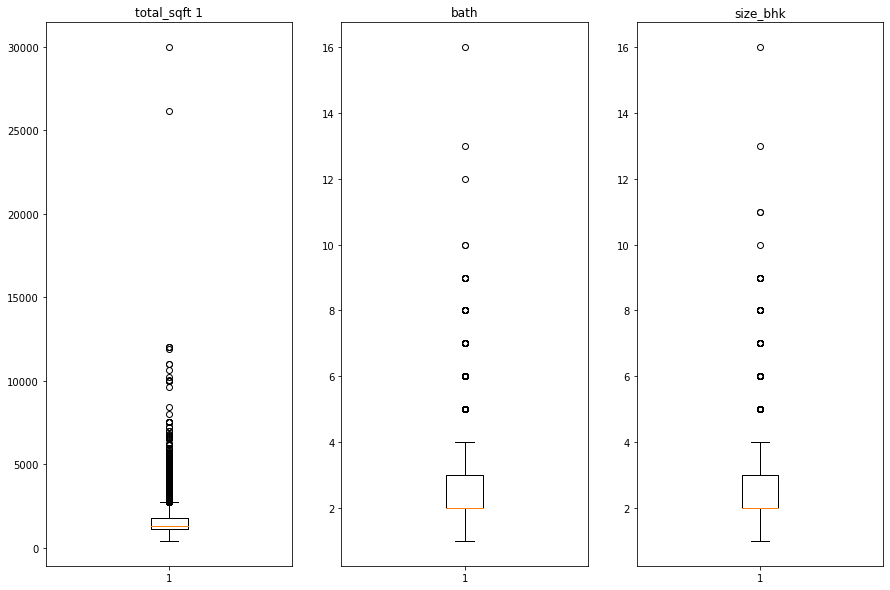

In [107]:
# Create a figure and three subplots for each boxplot
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,10))

# Create the first boxplot for total_sqft
ax1.boxplot(whole_new2_df2['total_sqft'])
ax1.set_title('total_sqft 1')

# Create the second boxplot for bath 
ax2.boxplot(whole_new2_df2['bath'])
ax2.set_title('bath')

# Create the third boxplot for bhk 
ax3.boxplot(whole_new2_df2['size_bhk'])
ax3.set_title('size_bhk')

# Show the plot
plt.show()

In [108]:
whole_new2_df2.drop(columns=['size','price_per_sqft','bhk_per_sqft'], axis=1, inplace=True)

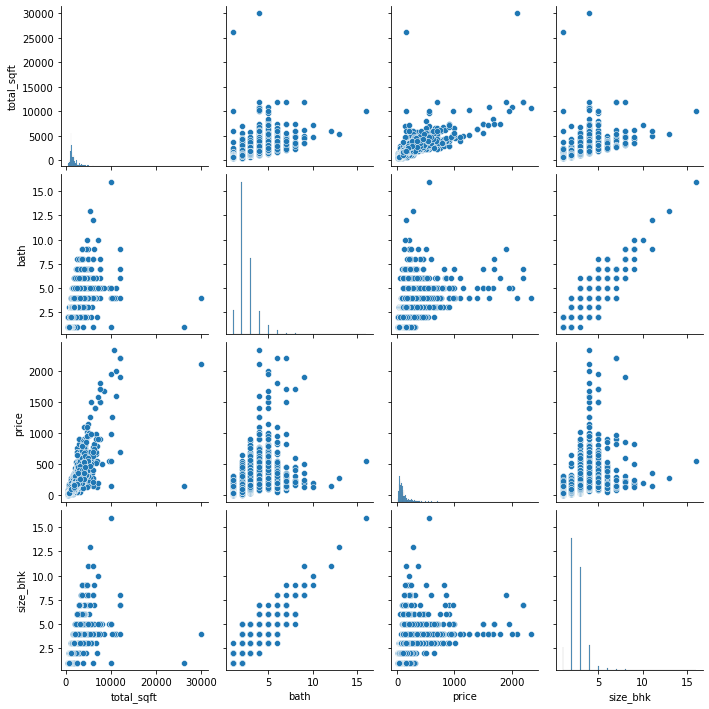

In [109]:
sns.pairplot(whole_new2_df2)

In [110]:
whole_new2_df2.to_csv("practice_cleaned_dataset.csv")

In [111]:
pp_df = pd.read_csv('practice_cleaned_dataset.csv')

In [112]:
pp_df.shape

(7677, 6)

In [113]:
pp_df.head()

,Unnamed: 0,location,total_sqft,bath,price,size_bhk
0,1,1st Phase JP Nagar,1875.0,3.0,167.0,3.0
1,2,1st Phase JP Nagar,2065.0,4.0,210.0,3.0
2,4,1st Phase JP Nagar,2059.0,3.0,225.0,3.0
3,5,1st Phase JP Nagar,1394.0,2.0,100.0,2.0
4,6,1st Phase JP Nagar,1077.0,2.0,93.0,2.0


In [114]:
pp_df = pd.read_csv("practice_cleaned_dataset.csv")

In [115]:
pp_df.shape

(7677, 6)

# Model training and Evaluation

In [116]:
#importing all the necessary libraries to perform the ML task
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [117]:
x1 = pp_df.drop(columns=['price','Unnamed: 0'])
y1 = pp_df['price']

In [118]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1, y1, test_size=0.25, random_state=10)

In [119]:
column_transformer = make_column_transformer((OneHotEncoder(sparse=False),['location']), remainder ='passthrough')

In [120]:
scaler = StandardScaler()

In [121]:
lr1 = LinearRegression(normalize=True)

In [122]:
pipe6 = make_pipeline(column_transformer,scaler, lr1)

In [123]:
pipe6.fit(x1_train,y1_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [163]:
y1_prediction_lr1 = list(pipe6.predict(x1_test))
r2_score(y1_test, y1_prediction_lr1)

0.7157450843972057

In [166]:
# Evaluate the model using mean squared error and mean absolute errro
mse_lr1 = mean_squared_error(y1_test, y1_prediction_lr1)
mae_lr1 = mean_absolute_error(y1_test, y1_prediction_lr1)
print("Mean Squared Error:", mse_lr1)
print("Mean Absolute Error:", mae_lr1)

Mean Squared Error: 7186.425987223807
Mean Absolute Error: 35.56298437429386


In [125]:
ls1= Lasso()

In [126]:
pipe11 = make_pipeline(column_transformer, scaler, ls1)

In [127]:
pipe11.fit(x1_train,y1_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [128]:
y1_prediction_ls1 = list(pipe11.predict(x1_test))
r2_score(y1_test, y1_prediction_ls1)

0.7148986626069167

In [167]:
# Evaluate the model using mean squared error and mean absolute errro
mse_ls1 = mean_squared_error(y1_test, y1_prediction_ls1)
mae_ls1 = mean_absolute_error(y1_test, y1_prediction_ls1)
print("Mean Squared Error:", mse_ls1)
print("Mean Absolute Error:", mae_ls1)

Mean Squared Error: 7207.824904941682
Mean Absolute Error: 35.09892241744172


In [129]:
rg1 = Ridge()

In [130]:
pipe7 = make_pipeline(column_transformer,scaler, rg1)

In [131]:
pipe7.fit(x1_train,y1_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [132]:
y1_prediction_rg1 = list(pipe7.predict(x1_test))
r2_score(y1_test, y1_prediction_rg1)

0.7156214374608125

In [168]:
# Evaluate the model using mean squared error and mean absolute errro
mse_rg1 = mean_squared_error(y1_test, y1_prediction_rg1)
mae_rg1 = mean_absolute_error(y1_test, y1_prediction_rg1)
print("Mean Squared Error:", mse_rg1)
print("Mean Absolute Error:", mae_rg1)

Mean Squared Error: 7189.551982617947
Mean Absolute Error: 35.55993534094411


In [133]:
from sklearn.svm import SVR

In [134]:
model1=SVR()

In [135]:
pipe8 = make_pipeline(column_transformer,scaler, model1)

In [136]:
pipe8.fit(x1_train,y1_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('svr', SVR())])

In [169]:
y1_prediction_svr = list(pipe8.predict(x1_test))

In [137]:
pipe8.score(x1_test,y1_test)

0.18712135823226506

In [170]:
# Evaluate the model using mean squared error and mean absolute errro
mse_svr1 = mean_squared_error(y1_test, y1_prediction_svr)
mae_svr1 = mean_absolute_error(y1_test, y1_prediction_svr)
print("Mean Squared Error:", mse_svr1)
print("Mean Absolute Error:", mae_svr1)

Mean Squared Error: 20550.892438468058
Mean Absolute Error: 51.6834626461522


In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
rfr1 = RandomForestRegressor()

In [140]:
pipe9 = make_pipeline(column_transformer,scaler, rfr1)

In [141]:
pipe9.fit(x1_train,y1_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [171]:
y1_prediction_rf = list(pipe9.predict(x1_test))

In [172]:
pipe9.score(x1_test,y1_test)

0.8190948489081642

In [173]:
# Evaluate the model using mean squared error and mean absolute errro
mse_rf1 = mean_squared_error(y1_test, y1_prediction_rf)
mae_rf1 = mean_absolute_error(y1_test, y1_prediction_rf)
print("Mean Squared Error:", mse_rf1)
print("Mean Absolute Error:", mae_rf1)

Mean Squared Error: 4573.57606735522
Mean Absolute Error: 26.142988903724994


In [143]:
from sklearn.linear_model import RANSACRegressor

In [144]:
ransac1 = RANSACRegressor()

In [145]:
pipe10 = make_pipeline(column_transformer,scaler, ransac1)

In [146]:
pipe10.fit(x1_train,y1_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('ransacregressor', RANSACRegressor())])

In [147]:
pipe10.score(x1_train,y1_train)

-2.5939373248439933e+26

# Comparison of the model's accuracy following the dataset's preprocessing in two distinct methods.

In [148]:
print('Model Accuracy for the First Case Dataset')
print()
print('LinearRegression Accuracy:', r2_score(y_test, y_prediction_lr)*100)
print('Lasso Accuracy:', r2_score(y_test, y_prediction_ls)*100)
print('Ridge Accuracy:', r2_score(y_test, y_prediction_rg)*100)

print('Support Vector Regressor Accuracy:', pipe4.score(x_test,y_test)*100)

Model Accuracy for the First Case Dataset

LinearRegression Accuracy: 36.81278598186021
Lasso Accuracy: 36.57727833247495
Ridge Accuracy: 36.812611148627994
Support Vector Regressor Accuracy: 36.54223457914143


In [149]:
print('Model Accuracy for the Second Case Dataset')
print()
print('LinearRegression Accuracy:', r2_score(y1_test, y1_prediction_lr1)*100)
print('Lasso Accuracy:', r2_score(y1_test, y1_prediction_ls1)*100)
print('Ridge Accuracy:', r2_score(y1_test, y1_prediction_rg1)*100)

print('Support Vector Regressor Accuracy:', pipe8.score(x1_test,y1_test)*100)
print('RandomForestRegressor Accuracy:', pipe9.score(x1_test,y1_test)*100)

Model Accuracy for the Second Case Dataset

LinearRegression Accuracy: 71.57450843972057
Lasso Accuracy: 71.48986626069167
Ridge Accuracy: 71.56214374608125
Support Vector Regressor Accuracy: 18.712135823226504
RandomForestRegressor Accuracy: 81.90948489081642
